In [2]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

In [4]:
#File Path 
file_path = '/Users/dinaeshs/Covid19_india_data/all_date.csv'
coloumn_list = ['Total Cases','Total Cured','Total Death','Total Active','Date']

In [5]:
#Creating Data_frame
ind_covid_df = pd.read_csv(file_path,header=None, names=coloumn_list)
formated_date_column = pd.to_datetime(ind_covid_df.Date,format='%Y-%m-%d %H:%M')
ind_covid_df['Date'] = formated_date_column
ind_covid_df.set_index('Date',inplace=True)

In [6]:
#Adding new calculated columns
resampled = ind_covid_df.resample('D').max().ffill().astype(int)
resampled['Daily New Cases'] = resampled['Total Cases'].diff().fillna(method='bfill')
resampled['Daily Cured Cases'] = resampled['Total Cured'].diff().fillna(method='bfill')
resampled['Daily New Death'] = resampled['Total Death'].diff().fillna(method='bfill')
resampled = resampled.astype(int)

In [7]:
resampled.columns = resampled.columns.str.replace(r' ','_',regex=True)

In [8]:
resampled.tail()

,Total_Cases,Total_Cured,Total_Death,Total_Active,Daily_New_Cases,Daily_Cured_Cases,Daily_New_Death
Date,,,,,,,
2020-04-05,3577,275,83,3219,505,62,8
2020-04-06,4281,319,111,3851,704,44,28
2020-04-07,4789,353,124,4312,508,34,13
2020-04-08,5274,411,149,4714,485,58,25
2020-04-09,5734,473,166,5095,460,62,17


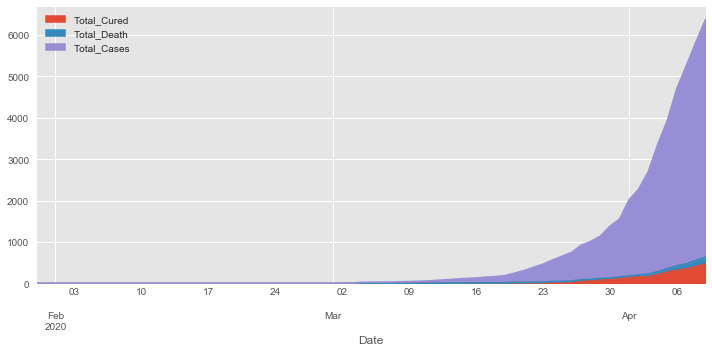

In [18]:
fig1, ax0 = plt.subplots(figsize = (10,5))
col_name = ['Total_Cured','Total_Death','Total_Cases']
resampled[col_name].plot(kind = 'area', ax=ax0)
#ax0.set_ylabel(col_name)
#ax0.set_title(col_name)
plt.tight_layout()
plt.style.use('ggplot')

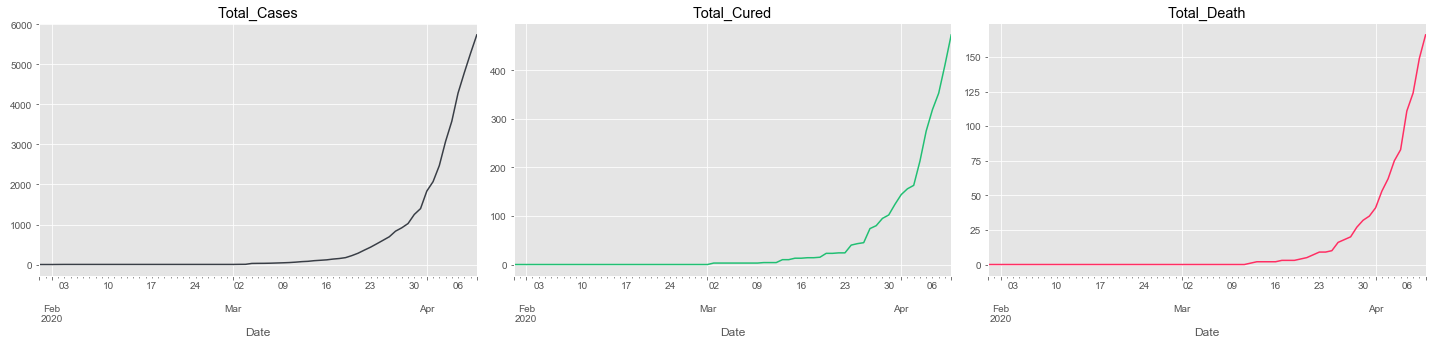

In [10]:
fig1, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize = (20,5))

resampled.Total_Cases.plot(ax=ax1,color = cnf)
resampled.Total_Cured.plot(ax=ax2,color = rec)
resampled.Total_Death.plot(ax=ax3,color = dth)

ax1.set_title('Total_Cases')
ax2.set_title('Total_Cured')
ax3.set_title('Total_Death')

fig1.tight_layout()
plt.style.use('seaborn')

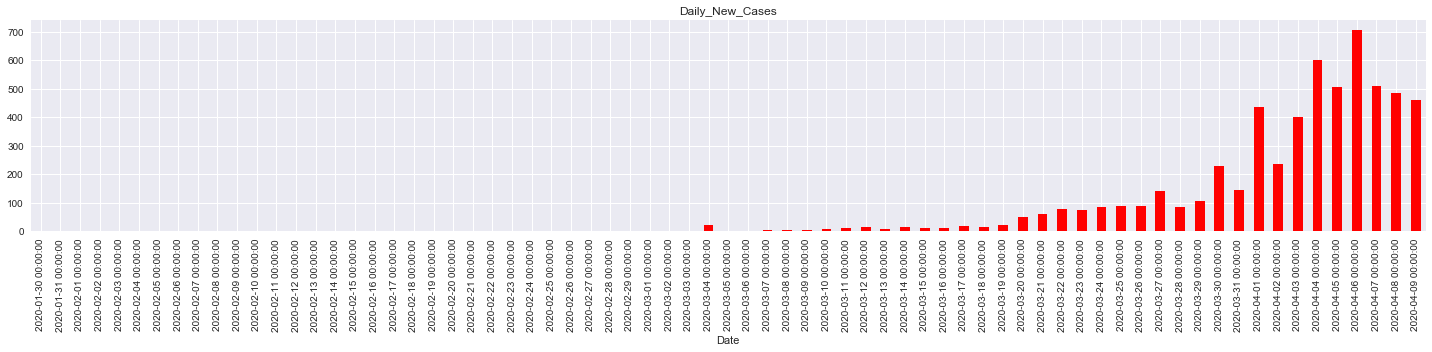

In [11]:
fig2 , ax4 = plt.subplots(figsize=(20,5))
resampled.Daily_New_Cases.plot(kind = 'bar', ax=ax4,color='r')

ax4.set_title('Daily_New_Cases')

plt.tight_layout()
plt.style.use('seaborn')

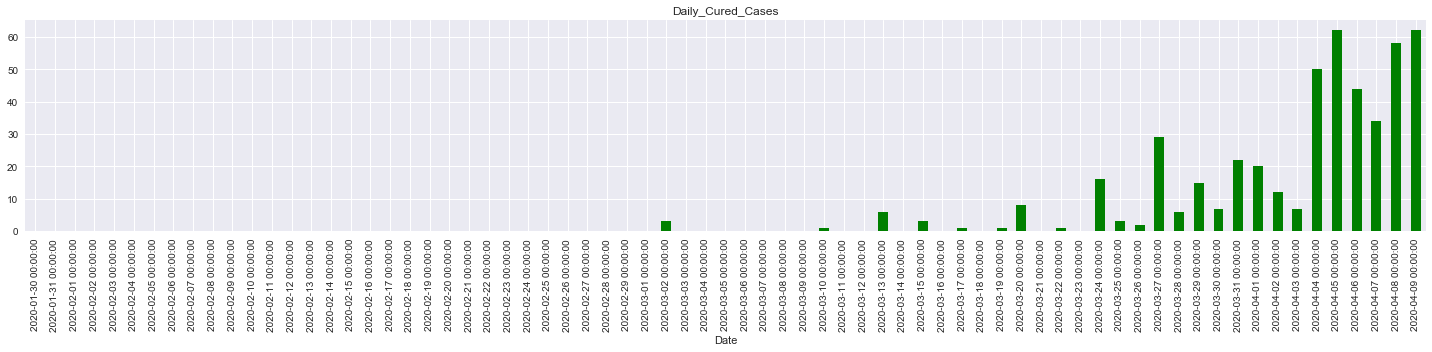

In [12]:
fig3 , ax5 = plt.subplots(figsize=(20,5))
resampled.Daily_Cured_Cases.plot(kind = 'bar', ax=ax5,color='g')

ax5.set_title('Daily_Cured_Cases')

plt.tight_layout()
plt.style.use('seaborn')

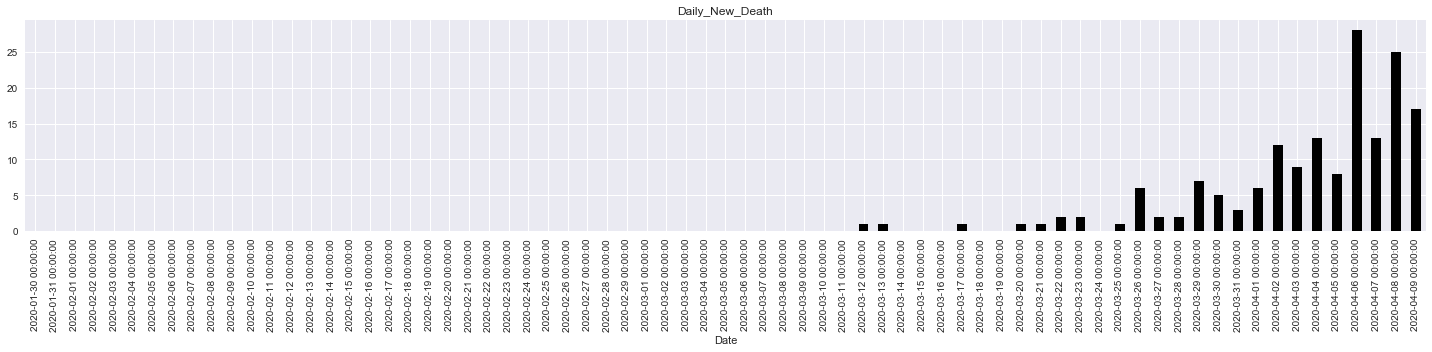

In [13]:
fig4 , ax6 = plt.subplots(figsize=(20,5))
resampled.Daily_New_Death.plot(kind = 'bar', ax=ax6,color='k')

ax6.set_title('Daily_New_Death')

plt.tight_layout()
plt.style.use('seaborn')

In [ ]:
"""STATE WISE STATS"""

In [14]:
#File Path and Import .csv
states_data_path = '/Users/dinaeshs/Covid19_india_data/latest_state_data.csv'
state_data = pd.read_csv(states_data_path)

In [15]:
#renaming column names and setting index col
state_data.columns = ['State_or_UT','Confirmed_Cases','Discharged','Death']
state_data.set_index('State_or_UT',inplace=True)

In [16]:
#New Coloumn
state_data['Active'] = state_data.Confirmed_Cases-state_data.Discharged-state_data.Death

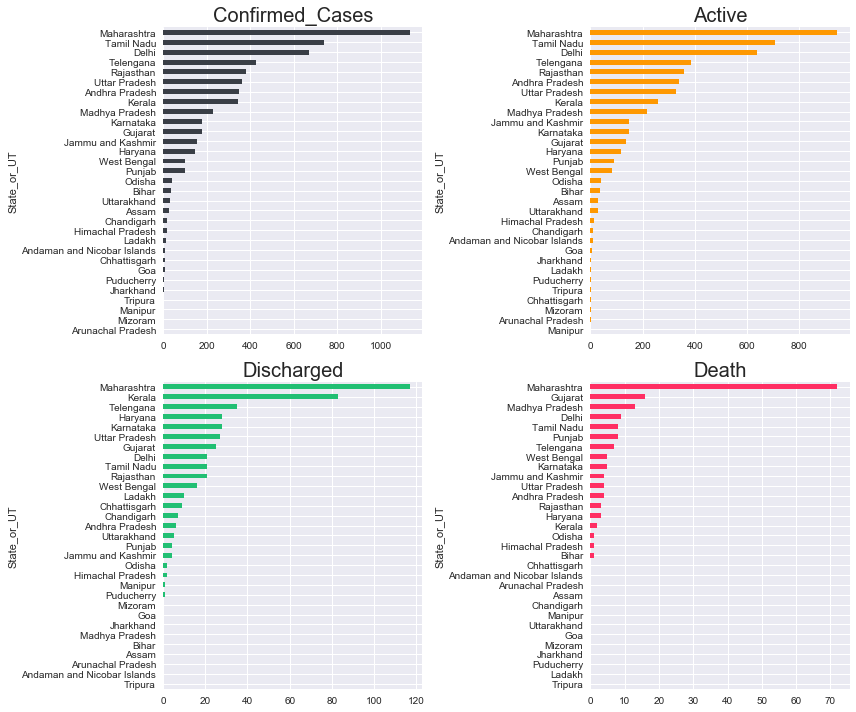

In [17]:
fig5 , ((ax7,ax8),(ax9,ax10)) = plt.subplots(nrows=2,ncols=2,figsize=(12,10))

state_data.Confirmed_Cases.sort_values().plot(kind='barh',ax=ax7,color=cnf)
ax7.set_title('Confirmed_Cases',fontsize=20)
state_data.Active.sort_values().plot(kind='barh',ax=ax8,color=act)
ax8.set_title('Active',fontsize=20)
state_data.Discharged.sort_values().plot(kind='barh',ax=ax9,color=rec)
ax9.set_title('Discharged',fontsize=20)
state_data.Death.sort_values().plot(kind='barh',ax=ax10,color=dth)
ax10.set_title('Death',fontsize=20)

plt.style.use('ggplot')
plt.tight_layout()

In [472]:
#state_data_con_cases = state_data.Confirmed_Cases

In [486]:
#state_data_con_cases=state_data_con_cases[state_data_con_cases==state_data_con_cases.max()]